**OlabisiDS Notebook**

Exploration Environment Set-Up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_kc = pd.read_csv("/content/kc_house_data.csv")
df_kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df_kc.shape
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df_kc.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df_kc.duplicated().sum()

0

In [6]:
def column_summary(data):
  col = []
  dtype = []
  unique = []
  nunique = []
  duplicated = []
  nulls = []

  for column in data.columns:
    col.append(column)
    dtype.append(data[column].dtype)
    unique.append(data[column].unique())
    nunique.append(data[column].nunique())
    duplicated.append(data[column].duplicated().sum())
    nulls.append(data[column].isnull().sum())

  return pd.DataFrame({'Column': col, 'Dtype': dtype,
                       'Unique': unique, 'Nunique': nunique,
                       'Duplicated Values': duplicated, 'Null Values': nulls})

In [7]:
column_summary(df_kc)

,Column,Dtype,Unique,Nunique,Duplicated Values,Null Values
0,id,int64,"[7129300520, 6414100192, 5631500400, 248720087...",21436,177,0
1,date,object,"[20141013T000000, 20141209T000000, 20150225T00...",372,21241,0
2,price,float64,"[221900.0, 538000.0, 180000.0, 604000.0, 51000...",4028,17585,0
3,bedrooms,int64,"[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]",13,21600,0
4,bathrooms,float64,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7...",30,21583,0
5,sqft_living,int64,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060...",1038,20575,0
6,sqft_lot,int64,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ...",9782,11831,0
7,floors,float64,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]",6,21607,0
8,waterfront,int64,"[0, 1]",2,21611,0
9,view,int64,"[0, 3, 4, 2, 1]",5,21608,0


Dropping columns that wont be needed going forward

In [8]:
df_kc.drop(columns="id", inplace=True)

creating new feature

In [9]:
#Extract year, month, and day using string slicing
df_kc["year"] = df_kc["date"].str[:4].astype(int)
df_kc["month"] = df_kc["date"].str[4:6].astype(int)
df_kc["day"] = df_kc["date"].str[6:8].astype(int)

#Drop the original date column
df_kc.drop(columns=["date"], inplace=True)

In [10]:
#knowing house age
df_kc["house_age"] = df_kc["year"] - df_kc["yr_built"]
df_kc["house_age"].head()

0    59
1    63
2    82
3    49
4    28
Name: house_age, dtype: int64

In [11]:
#Calculating years since last renovation or set to 0 if never renovated
df_kc["house_reno"] = df_kc.apply(lambda row: row["year"] - row["yr_renovated"] if row["yr_renovated"] != 0 else 0, axis=1)

df_kc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,house_age,house_reno
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,13,59,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,9,63,23.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,25,82,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,9,49,0.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,18,28,0.0


In [12]:
df_kc.drop(columns=["year", "yr_built", "yr_renovated"], axis=1, inplace=True)
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
 17  month          21613 non-null  int64  
 18  day   

In [13]:
df_kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,house_age,house_reno
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,15.688197,43.317818,0.779947
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,8.635063,29.375493,4.895330
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000,-1.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,8.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,16.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,23.000000,63.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,31.000000,115.000000,80.000000


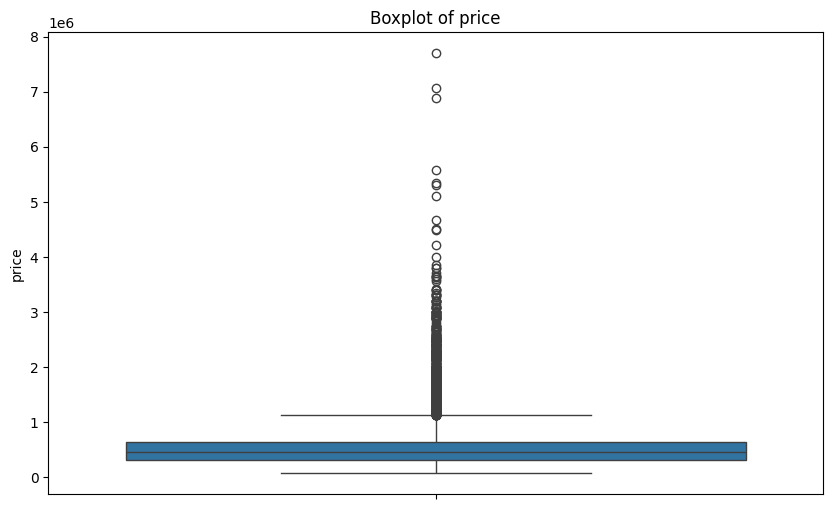

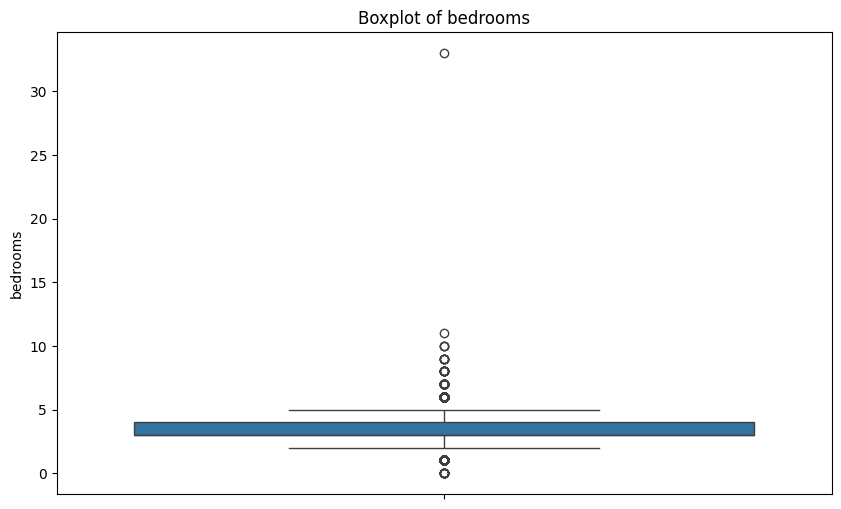

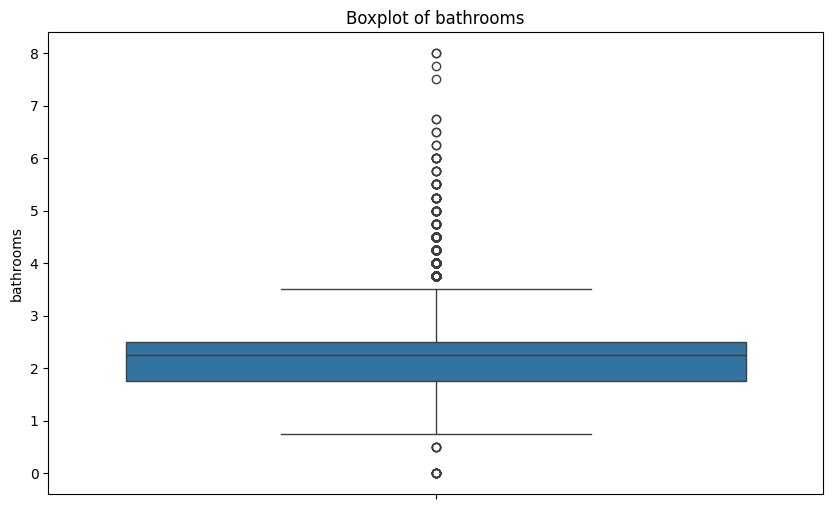

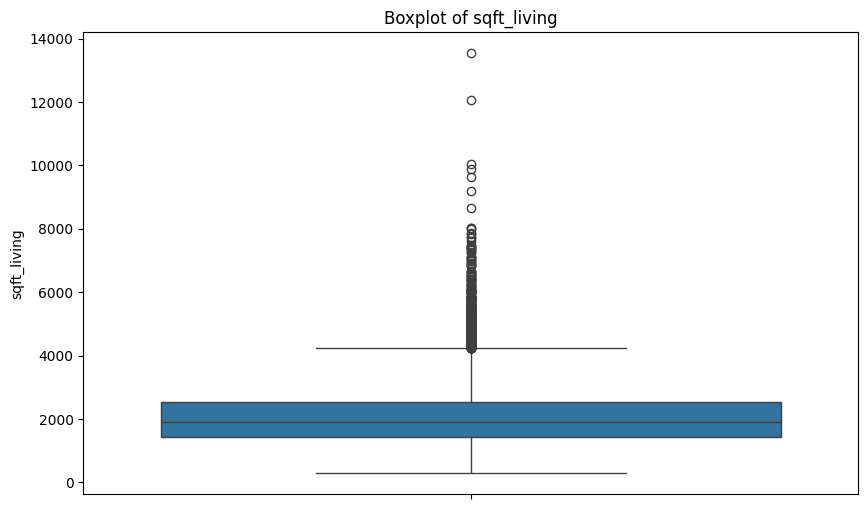

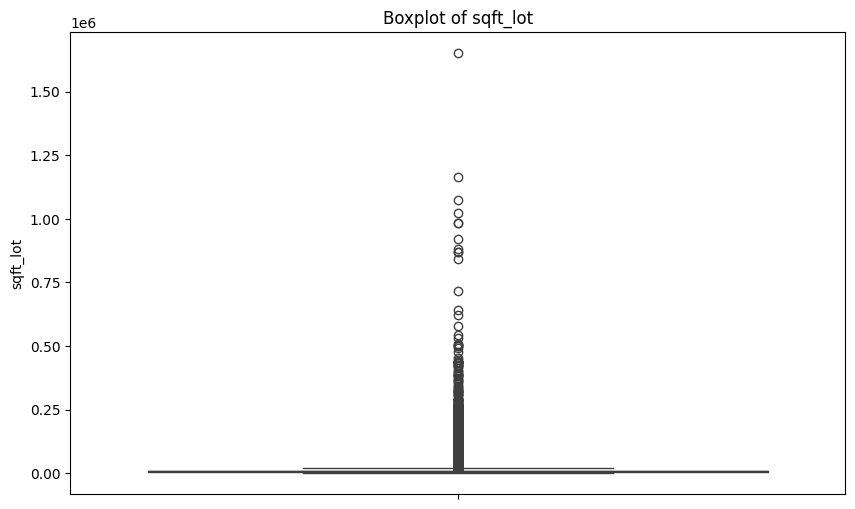

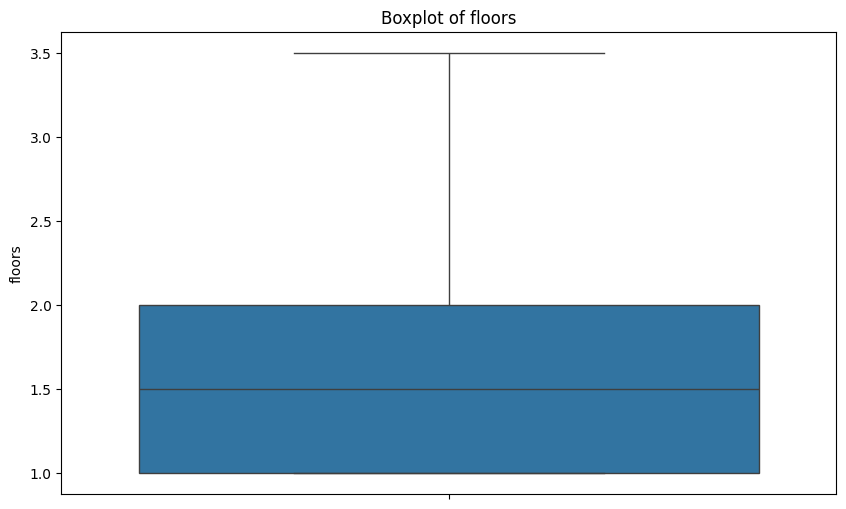

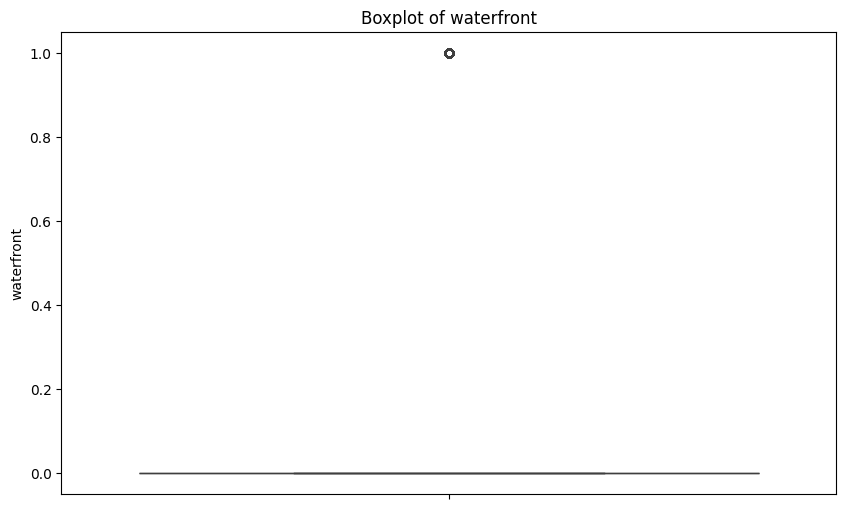

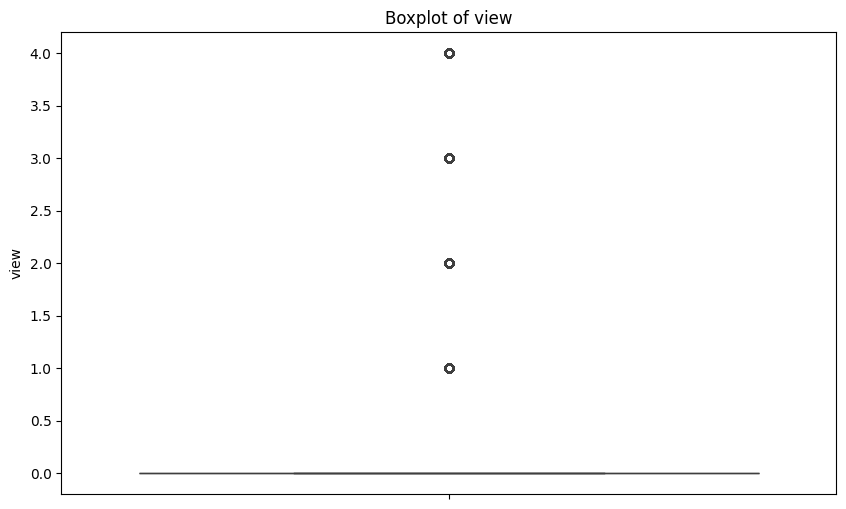

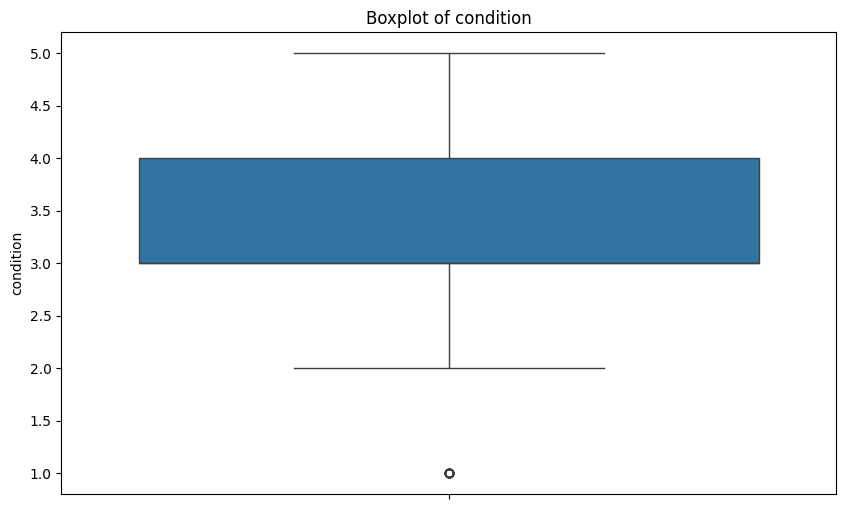

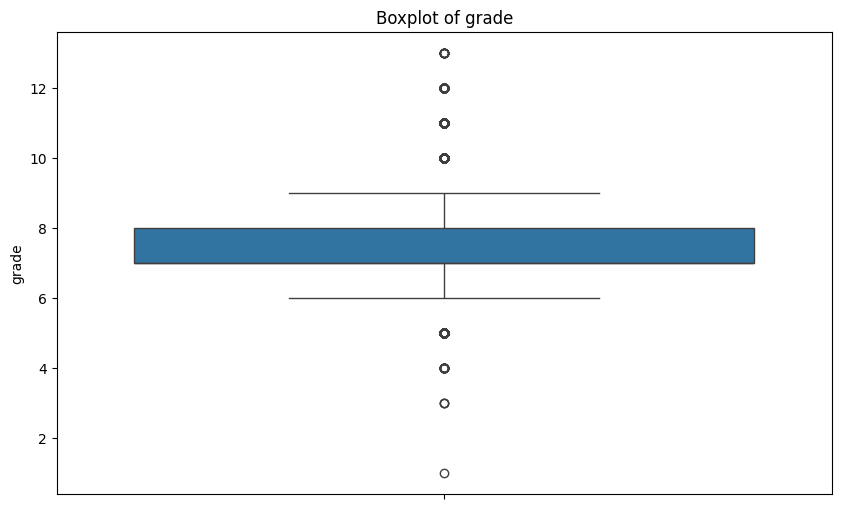

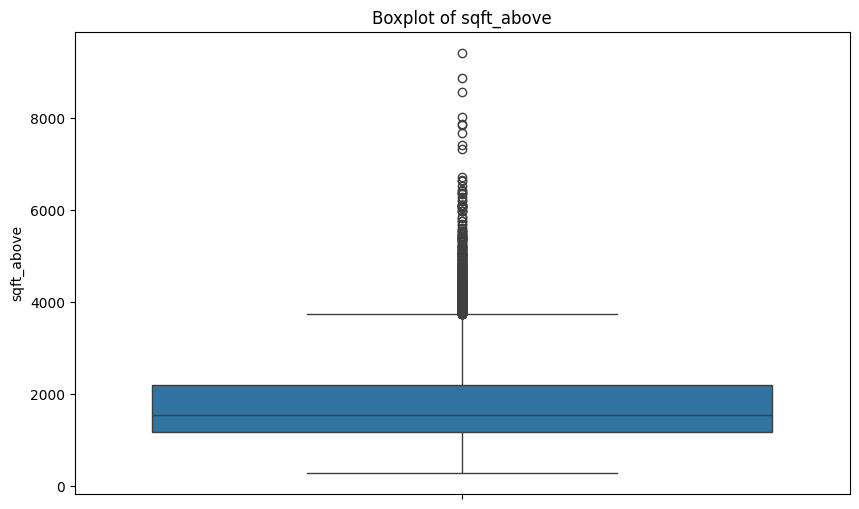

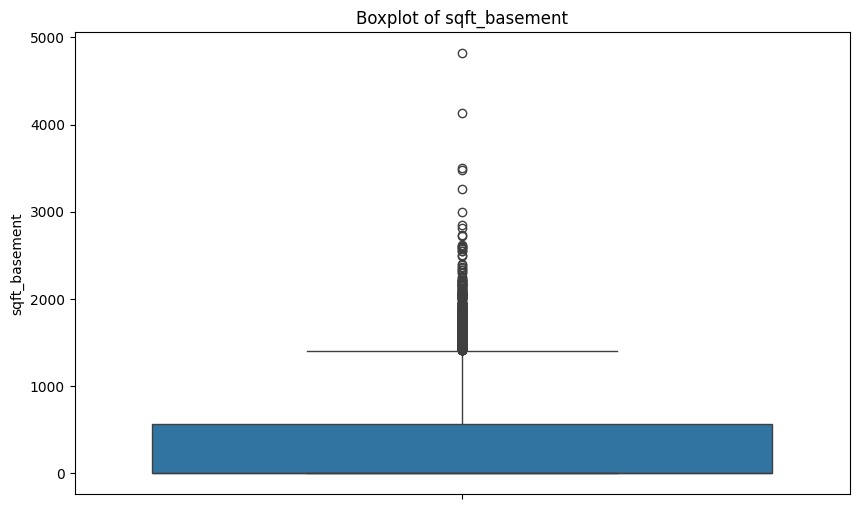

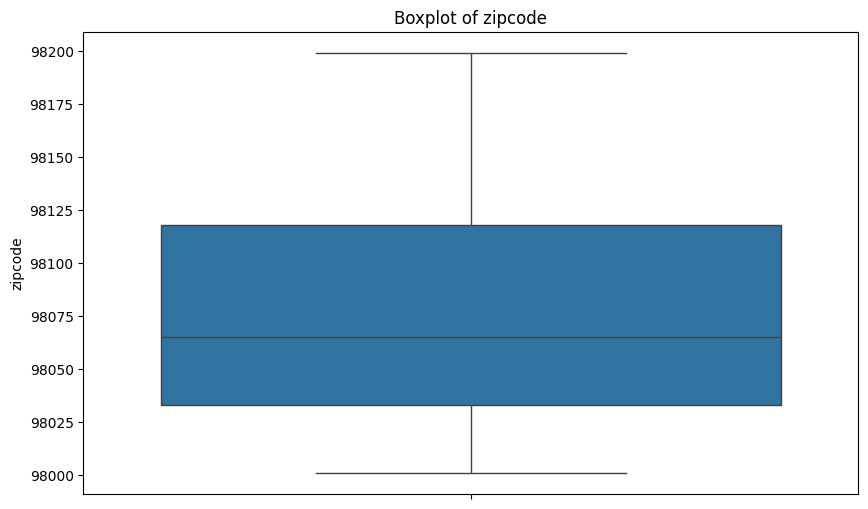

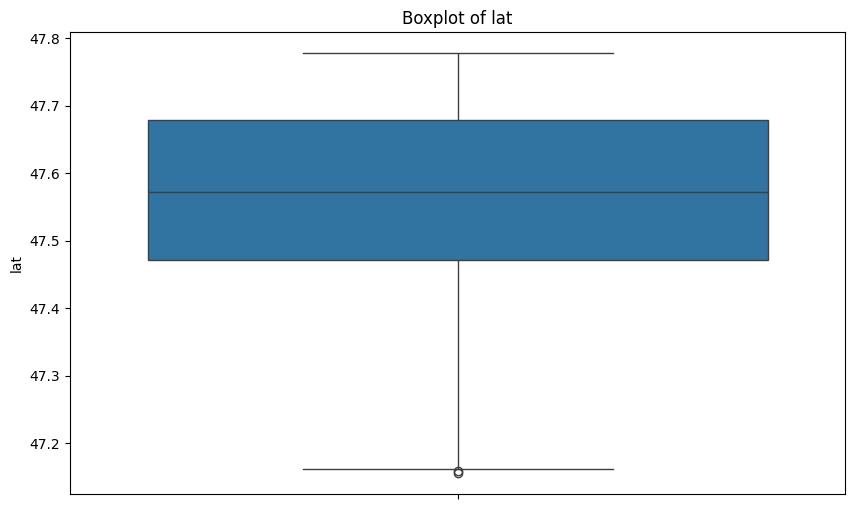

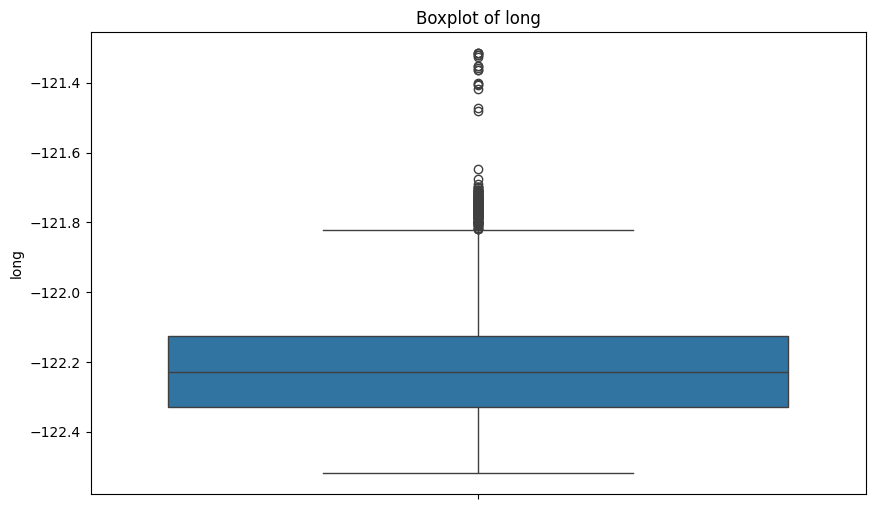

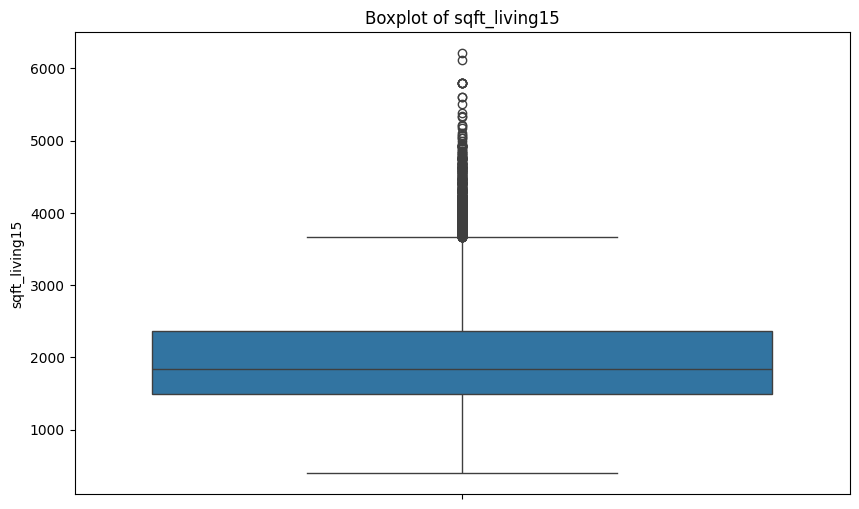

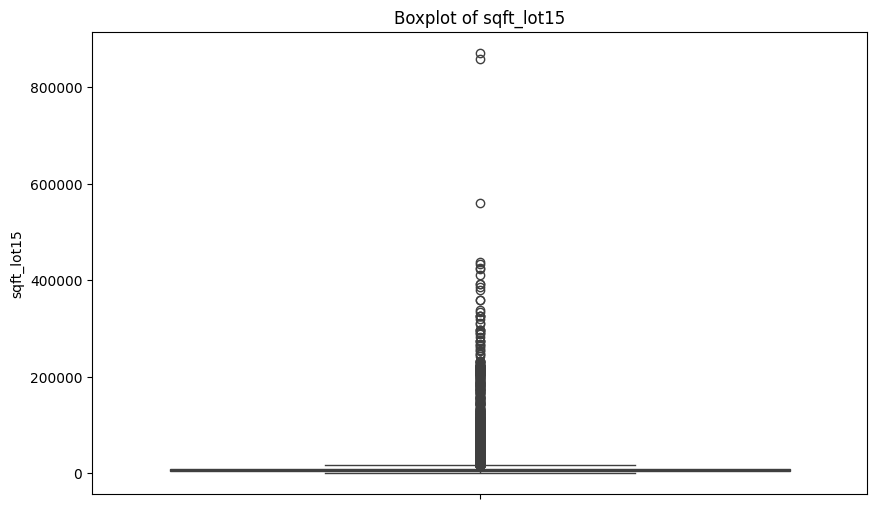

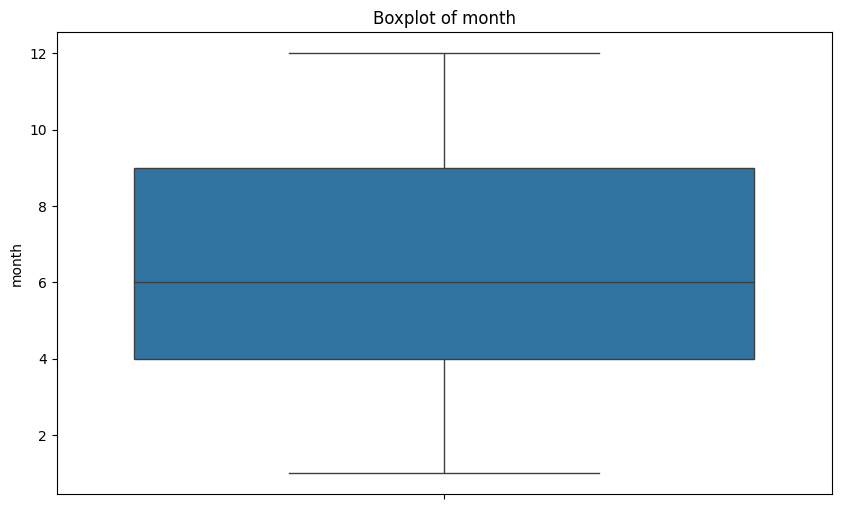

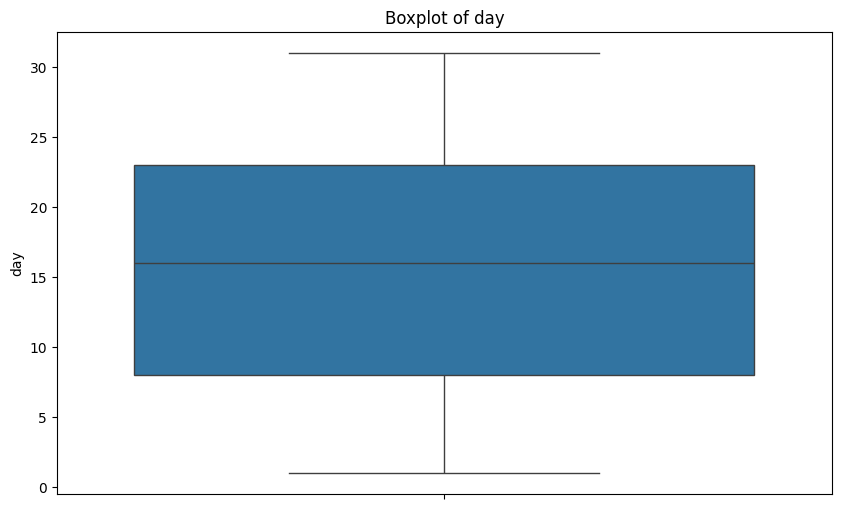

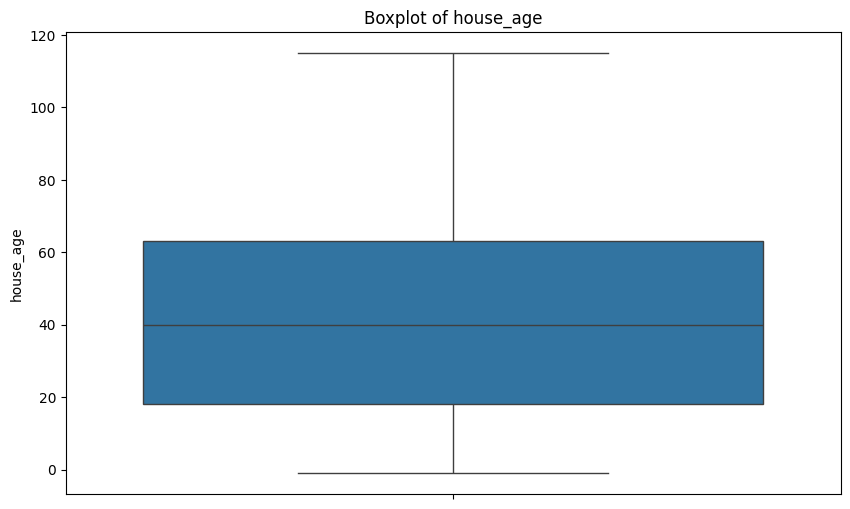

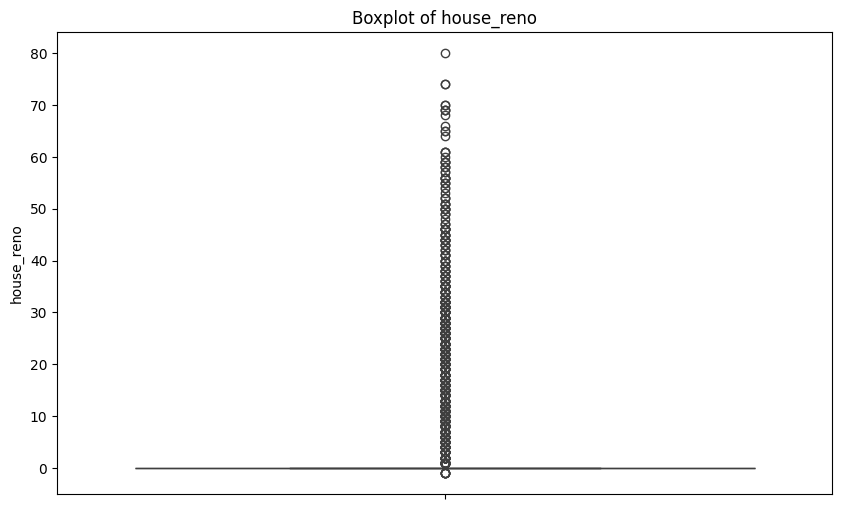

In [14]:
#Visualization for each column in the dataset to check for outliers
def visualize_outliers(data):
    for col in data.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data[col])
        plt.title(f'Boxplot of {col}')
        plt.show();

visualize_outliers(data=df_kc)

XgBoost is robust to outliers, we will be keeping our data like this

Outliers reduced

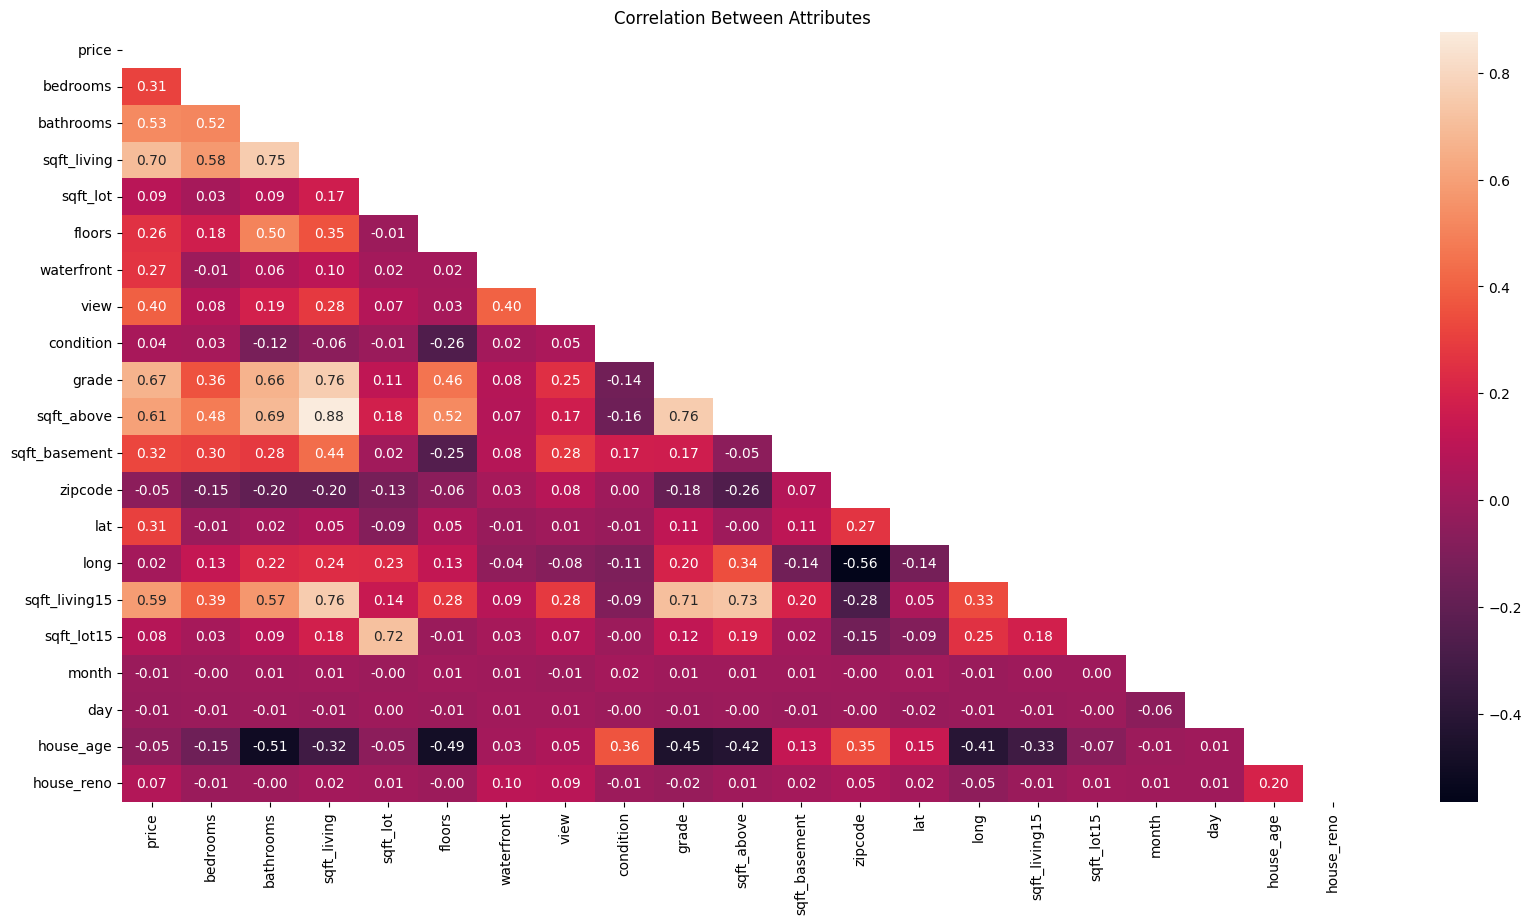

In [15]:
corr = df_kc.corr()
mask = np.triu(corr)
fig = plt.figure(figsize=(20,10))
sns.heatmap(corr,
            mask=mask,
            annot=True,
            fmt='.2f')
plt.title("Correlation Between Attributes")
plt.show();

Visualization of Distributions

In [16]:
df_kc.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
day              0
house_age        0
house_reno       0
dtype: int64

In [17]:
#Drop rows where sqft_above is null
df_kc.dropna(subset=["sqft_above"], inplace=True)

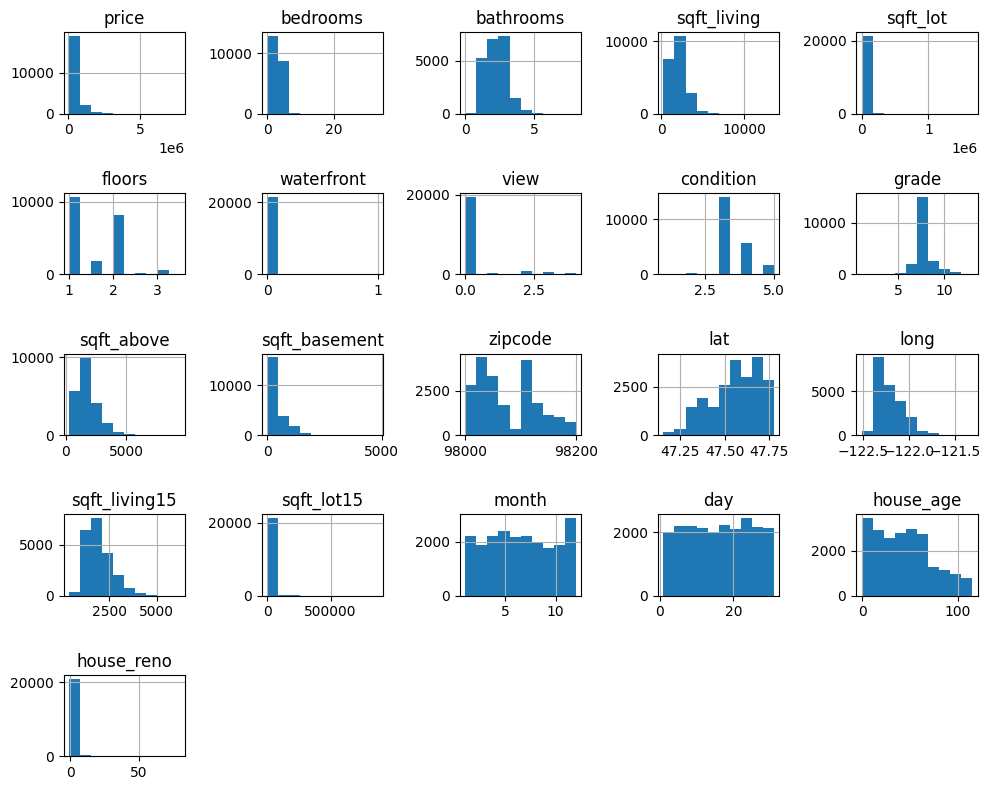

In [18]:
df_kc.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

**Modelling**

We now moving forward to setting our features and target, splitting our dataset, building several machine learning models and comparing which is the best.

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [20]:
#Transforming zipcode so the model doesnt see it as a continous variable
le = LabelEncoder()
df_kc["zipcode"] = le.fit_transform(df_kc["zipcode"])
df_kc["zipcode"].head()

0    66
1    55
2    16
3    58
4    37
Name: zipcode, dtype: int64

In [21]:
features = df_kc.drop(columns="price", axis=1)
target = df_kc["price"]
X = features
y = target
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (21611, 20)
y shape: (21611,)


In [22]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train_Shape", X_train.shape)
print("X_test_shape", X_test.shape)
print("y_train_shape", y_train.shape)
print("y_test_shape", y_test.shape)

X_train_Shape (17288, 20)
X_test_shape (4323, 20)
y_train_shape (17288,)
y_test_shape (4323,)


In [23]:
#Log transformation of target variable
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Linear Regression**

In [25]:
lr_model = LinearRegression()

#fitting lr_model to training set
lr_model.fit(X_train, y_train)

#mChecking lr model accuracy on training set
lr_model_acc = lr_model.score(X_train, y_train)
lr_model_acc.round(2)

0.77

In [26]:
#Evaluation of lr_model om test set
lr_test_pred = lr_model.predict(X_test)
mse_lr_test = mean_squared_error(y_test, lr_test_pred)
r2_lr_test = r2_score(y_test, lr_test_pred)
mae_lr_test = mean_absolute_error(y_test, lr_test_pred)
lr_test_acc = lr_model.score(X_test, y_test)

print("Test lr set:")
print("Mean Squared Error:", mse_lr_test.round(2))
print("R Squared:", r2_lr_test.round(2))
print("Mean Absolute Error:", mae_lr_test.round(2))
print("lr Test Accueacy:", lr_test_acc.round(2))

Test lr set:
Mean Squared Error: 0.06
R Squared: 0.78
Mean Absolute Error: 0.19
lr Test Accueacy: 0.78


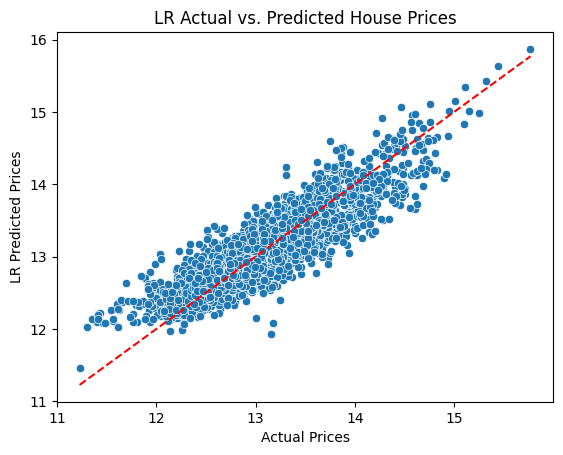

In [27]:
sns.scatterplot(x=y_test, y=lr_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("LR Predicted Prices")
plt.title("LR Actual vs. Predicted House Prices")
plt.show()

**Ridge Model**

In [28]:
ridge = Ridge()

#fitting ridge to training set
ridge.fit(X_train, y_train)

#mChecking ridge accuracy on training set
ridge_acc = ridge.score(X_train, y_train)
ridge_acc.round(2)

0.77

In [29]:
#Evaluation of ridge model om test set
ridge_test_pred = ridge.predict(X_test)
ridge_mse_test = mean_squared_error(y_test, ridge_test_pred)
ridge_r2_test = r2_score(y_test, ridge_test_pred)
ridge_mae_test = mean_absolute_error(y_test, ridge_test_pred)
ridge_test_acc = ridge.score(X_test, y_test)

print("Ridge Test Set:")
print("Mean Squared Error:", ridge_mse_test.round(2))
print("R Squared:", ridge_r2_test.round(2))
print("Mean Absolute Error:", ridge_mae_test.round(2))
print("Ridge Test Accueacy:", ridge_test_acc.round(2))

Ridge Test Set:
Mean Squared Error: 0.06
R Squared: 0.78
Mean Absolute Error: 0.19
Ridge Test Accueacy: 0.78


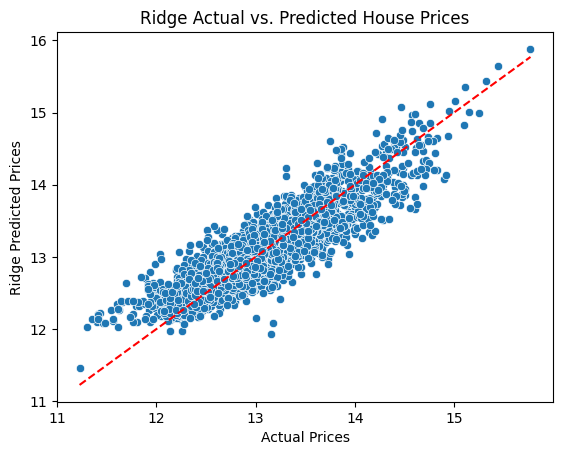

In [30]:
sns.scatterplot(x=y_test, y=ridge_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Ridge Predicted Prices")
plt.title("Ridge Actual vs. Predicted House Prices")
plt.show()

**Decision Tree Regressor**

In [31]:
def objective(space):
    reg = DecisionTreeRegressor(
        max_depth=int(space['max_depth']),
        min_samples_split=int(space['min_samples_split']),
        min_samples_leaf=int(space['min_samples_leaf'])
    )

    reg.fit(X_train, y_train)

    pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print("MSE:", mse)

    return {'loss': mse, 'status': STATUS_OK}

space = {
    'max_depth': hp.quniform('max_depth', 3, 30, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1)
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best parameters:", best)

MSE:
0.04663462068410659
MSE:
0.04678089918581614
MSE:
0.04579946373801252
MSE:
0.05132257193889537
MSE:
0.04619858577734109
MSE:
0.054286150271681204
MSE:
0.05144950440680837
MSE:
0.046227473568387197
MSE:
0.04619861055153822
MSE:
0.05151617012148135
MSE:
0.04600437241046419
MSE:
0.04416084637940677
MSE:
0.048368204635183334
MSE:
0.09702651429902864
MSE:
0.04698365395023178
MSE:
0.04601745666866835
MSE:
0.045884779252152355
MSE:
0.04578798277263343
MSE:
0.056371373913560036
MSE:
0.04607301269100077
MSE:
0.04699970213261707
MSE:
0.08324488991711226
MSE:
0.05570228064742161
MSE:
0.045720722704646326
MSE:
0.044166274493311716
MSE:
0.0616677473132651
MSE:
0.04577557015626984
MSE:
0.07097862328439669
MSE:
0.046868583726373064
MSE:
0.044153574064576526
MSE:
0.045240111742614206
MSE:
0.045254583835636054
MSE:
0.04568004433376357
MSE:
0.04606591081751282
MSE:
0.05095242117934103
MSE:
0.04650157938794068
MSE:
0.045061524489078346
MSE:
0.055478373845535466
MSE:
0.06170583432670402
MSE:
0.046220

In [32]:
best_params = {key: int(value) for key, value in best.items()}
dtr_model = DecisionTreeRegressor(**best_params)
dtr_model.fit(X_train, y_train)

#Checking dtr accuracy on training set
dtr_acc = dtr_model.score(X_train, y_train)
dtr_acc.round(2)

0.9

In [33]:
#Evaluation of dtr model on test set
dtr_test_pred = dtr_model.predict(X_test)
dtr_mse_test = mean_squared_error(y_test, dtr_test_pred)
dtr_r2_test = r2_score(y_test, dtr_test_pred)
dtr_mae_test = mean_absolute_error(y_test, dtr_test_pred)

print("DTR Test Set:")
print("Mean Squared Error:", dtr_mse_test.round(2))
print("R Squared:", dtr_r2_test.round(2))
print("Mean Absolute Error:", dtr_mae_test.round(2))

DTR Test Set:
Mean Squared Error: 0.04
R Squared: 0.84
Mean Absolute Error: 0.15


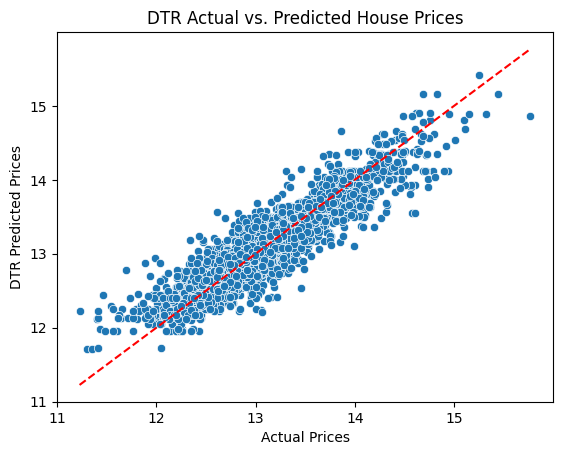

In [35]:
sns.scatterplot(x=y_test, y=dtr_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("DTR Predicted Prices")
plt.title("DTR Actual vs. Predicted House Prices")
plt.show()

**XGB Regressor**

In [36]:
def objective(space):
    reg = XGBRegressor(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=space['reg_alpha'],
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=space['colsample_bytree']
    )

    scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    return {'loss': mse, 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 10),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'reg_alpha': hp.quniform('reg_alpha', 0, 50, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print("Best parameters:", best)

100%|██████████| 100/100 [04:32<00:00,  2.73s/trial, best loss: 0.028021468262640375]
Best parameters: {'colsample_bytree': 0.978527244818189, 'gamma': 0.0003574521729691575, 'max_depth': 7.0, 'min_child_weight': 9.0, 'n_estimators': 740.0, 'reg_alpha': 5.0}


In [37]:
best_params = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'gamma': best['gamma'],
    'reg_alpha': best['reg_alpha'],
    'min_child_weight': int(best['min_child_weight']),
    'colsample_bytree': best['colsample_bytree']
}

xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X_train, y_train)

# Checking XGBoost model accuracy on training set
xgb_acc = xgb_model.score(X_train, y_train)
xgb_acc.round(2)

0.94

In [38]:
#Evaluation of xgb model on test set
xgb_test_pred = xgb_model.predict(X_test)
xgb_mse_test = mean_squared_error(y_test, xgb_test_pred)
xgb_r2_test = r2_score(y_test, xgb_test_pred)
xgb_mae_test = mean_absolute_error(y_test, xgb_test_pred)

print("XGB Test Set:")
print("Mean Squared Error:", xgb_mse_test.round(2))
print("R Squared:", xgb_r2_test.round(2))
print("Mean Absolute Error:", xgb_mae_test.round(2))

XGB Test Set:
Mean Squared Error: 0.03
R Squared: 0.9
Mean Absolute Error: 0.12


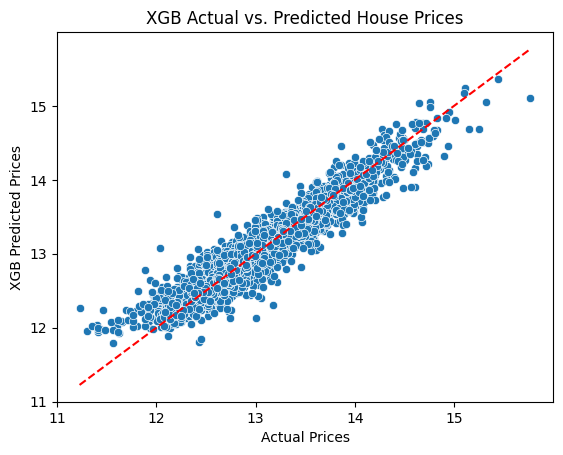

In [39]:
sns.scatterplot(x=y_test, y=xgb_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("XGB Predicted Prices")
plt.title("XGB Actual vs. Predicted House Prices")
plt.show()

In [45]:
#Get feature importance
importance_scores = xgb_model.get_booster().get_score(importance_type="weight")
importance_df_kc = pd.DataFrame({"Feature": importance_scores.keys(), "Importance": importance_scores.values()})

#Sort
importance_df_kc = importance_df_kc.sort_values(by="Importance", ascending=False)
print(importance_df_kc)

   Feature  Importance
12     f12       755.0
13     f13       724.0
18     f18       456.0
3       f3       409.0
14     f14       385.0
15     f15       384.0
11     f11       361.0
2       f2       347.0
17     f17       318.0
9       f9       290.0
16     f16       221.0
10     f10       174.0
8       f8       148.0
7       f7       121.0
1       f1       117.0
0       f0        89.0
6       f6        80.0
19     f19        72.0
4       f4        54.0
5       f5        14.0


Creating a DataFrame for models and their respective evaluation metrics

In [40]:
model_dataframe = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge", "Decision Tree", "XGB"],
    "Accuracy": [lr_model_acc, ridge_acc, dtr_acc, xgb_acc],
    "Mean Squared Error": [mse_lr_test, ridge_mse_test, dtr_mse_test, xgb_mse_test],
    "R Squared": [r2_lr_test, ridge_r2_test, dtr_r2_test, xgb_r2_test],
    "Mean Absolute Error": [mae_lr_test, ridge_mae_test, dtr_mae_test, xgb_mae_test]
})

models_df = model_dataframe.sort_values(by="R Squared", ascending=False)

In [41]:
models_df = models_df.reset_index(drop=True)
models_df

,Model,Accuracy,Mean Squared Error,R Squared,Mean Absolute Error
0,XGB,0.939763,0.027783,0.901768,0.119992
1,Decision Tree,0.899719,0.044156,0.843875,0.152852
2,Linear Regression,0.768874,0.062800,0.777958,0.193917
3,Ridge,0.768868,0.062825,0.777868,0.193914


l